# Separating Non-Linear Dataset

![example image](http://www.eric-kim.net/eric-kim-net/posts/1/imgs/data_2d_to_3d.png)

In [25]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [26]:
X,Y = make_circles(n_samples = 500, noise = 0.03)

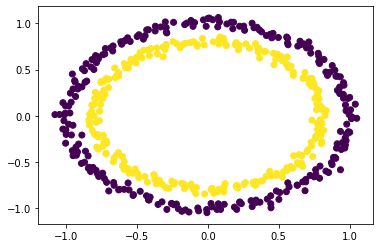

In [27]:
plt.scatter(X[:,0],X[:,1],c=Y)

### Task here is to find a non linear tranformation function.
This function would map my two featured data to a new three featured system.

In [28]:
def transformer(X):
    """Obviously an autobot :)"""
    """Non Linear Transforation is done here"""
    
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_

In [29]:
X_ = transformer(X)

(500, 3)


In [30]:
print(X[:5])
print()
print(X_[:5])

[[ 0.80002619 -0.30199903]
 [ 0.2026964  -0.75128831]
 [-0.35598505  0.66888871]
 [ 0.66910038 -0.71494446]
 [-0.11787248 -0.73830754]]

[[ 0.80002619 -0.30199903  0.73124532]
 [ 0.2026964  -0.75128831  0.60551995]
 [-0.35598505  0.66888871  0.57413746]
 [ 0.66910038 -0.71494446  0.9588409 ]
 [-0.11787248 -0.73830754  0.55899195]]


In [31]:
def plot3D(X, show=True):
    fig = plt.figure(figsize=(10,10))
    a = fig.add_subplot(111,projection="3d")
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    a.scatter(X1,X2,X3, zdir="z", s=50, c=Y, depthshade=True)
    
    if show==True: 
        plt.show()
    return a

### Logistic Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [33]:
lr = LogisticRegression(solver="lbfgs")

In [34]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 45.2000


Logistic classfier on new dataset

In [35]:
acc2 = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc2*100))

Accuracy X(2D) is 100.0000


## Visualising Decision Surface

In [36]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
weights = lr.coef_

In [38]:
bias = lr.intercept_

In [39]:
xp,yp = np.meshgrid(range(-2,2),range(-2,2))

In [40]:
print(xp)
print(yp)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [41]:
z = -(weights[0,0]*xp + weights[0,1]*yp + bias)/weights[0,2]

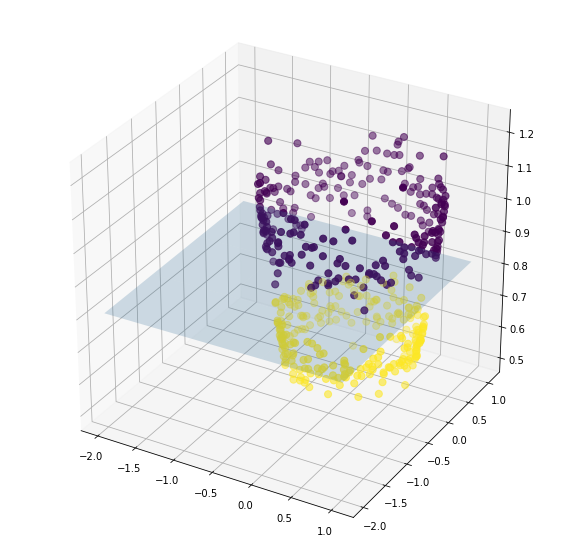

In [45]:
a = plot3D(X_,False)
a.plot_surface(xp,yp,z,alpha=0.2)
plt.show()